In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.load_mnist import load_mnist
from core.network.twolayernet import BackPropagationNet

In [2]:
(X_train, T_train), (X_test, T_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
test_network = BackPropagationNet(784, 50, 10)
X_batch = X_train[:3]
T_batch = T_train[:3]

grad_numerical = test_network.numerical_gradient(X_batch, T_batch)
grad_backdrop = test_network.gradient(X_batch, T_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backdrop[key] - grad_numerical[key]))
    print(f"{key}: {diff}")

W1: 5.143371116684747e-09
B1: 4.507476510740103e-08
W2: 8.095486617452944e-07
B2: 4.896668994178524e-07


In [4]:
network = BackPropagationNet(784, 50, 10)

iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    T_batch = T_train[batch_mask]

    grad = network.gradient(X_batch, T_batch)

    for key in ("W1", "B1", "W2", "B2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(X_batch, T_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, T_train)
        test_acc = network.accuracy(X_test, T_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11215, 0.1145
train acc, test acc | 0.8655333333333334, 0.8711
train acc, test acc | 0.9043666666666667, 0.9081
train acc, test acc | 0.9248333333333333, 0.9262
train acc, test acc | 0.9276333333333333, 0.9296
train acc, test acc | 0.9434166666666667, 0.9414
train acc, test acc | 0.9378, 0.9385
train acc, test acc | 0.94695, 0.9456
train acc, test acc | 0.9475, 0.944
train acc, test acc | 0.9544333333333334, 0.9509
train acc, test acc | 0.9573166666666667, 0.9537
train acc, test acc | 0.9629833333333333, 0.958
train acc, test acc | 0.9624333333333334, 0.9572
train acc, test acc | 0.9600833333333333, 0.9565
train acc, test acc | 0.9612333333333334, 0.9566
train acc, test acc | 0.9671, 0.9589
train acc, test acc | 0.9704166666666667, 0.9634


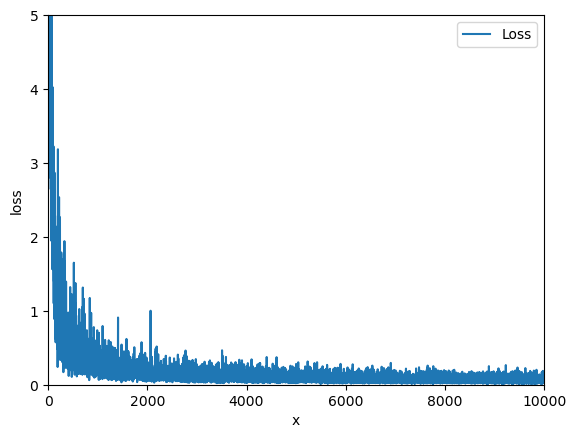

In [5]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label="Loss")
plt.xlim(0, 10000)
plt.ylim(0, 5.0)
plt.xlabel("x")
plt.ylabel("loss")
plt.legend()
plt.show()

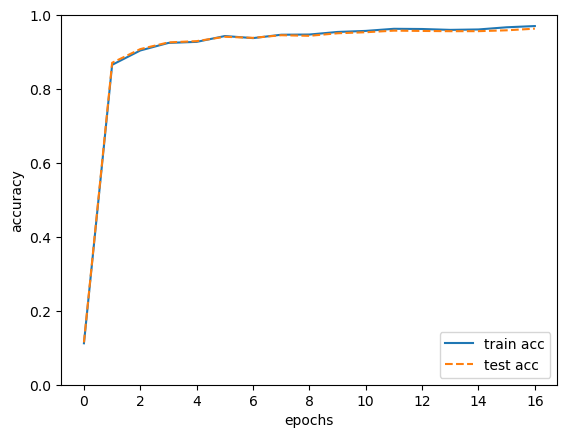

In [6]:
markers = {"train": "o", "test": "s"}

x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

In [7]:
print(f"final loss: {train_loss_list[-1]}")
print(f"final train accuracy: {train_acc_list[-1]}")
print(f"final test accuracy: {test_acc_list[-1]}")

final loss: 0.07130302308296547
final train accuracy: 0.9704166666666667
final test accuracy: 0.9634
